In [67]:
# import libraries
import os 
import re  
import pandas as pd

# We will use the following Scikit-Learn classes for the activity
from sklearn.metrics import confusion_matrix
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn import metrics

In [68]:
# use nltk libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer as regextoken

In [69]:
# set directory
import os
 
os.getcwd()

'C:\\Users\\yeleri\\Downloads\\DL_TM_Cute\\CSE7321c_Deep_Learning and Text_Mining_CUTe'

In [70]:
os.chdir('C:\\Users\\yeleri\\Downloads\\DL_TM_Cute\\CSE7321c_Deep_Learning and Text_Mining_CUTe')

In [71]:
os.getcwd()

'C:\\Users\\yeleri\\Downloads\\DL_TM_Cute\\CSE7321c_Deep_Learning and Text_Mining_CUTe'

In [72]:
import numpy
numpy.random.seed(123)

In [73]:
#reading train data
review_DF_train = pd.read_csv('train.csv')

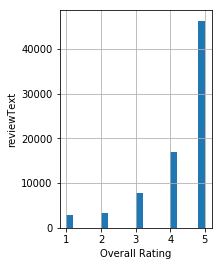

In [121]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)
fig = review_DF_train['overall'].hist(bins=20)
fig.set_ylabel('reviewText')
fig.set_xlabel('Overall Rating')

plt.show()

In [74]:
print(review_DF_train.head(10))

   ID                                         reviewText  overall
0   1  These are so wonderful to have in the car in t...        5
1   2  XL fits perfect on me over armored riding jack...        5
2   3  Since I had just noticed my wiper blades neede...        3
3   4  I am very satisfied with G110v2.  It is comfor...        5
4   5  This amp did a good job for its rating. It was...        3
5   6  Had flushed the water heater with just the gar...        5
6   7  Lots of mixed reviews on this one but I though...        2
7   8  This is without a doubt one of the top shows o...        5
8   9  My Miata actually takes the HP-1008 which is s...        5
9  10  Many think, especially those that have not see...        5


In [75]:
review_DF_train.columns

Index(['ID', 'reviewText', 'overall'], dtype='object')

In [76]:
type(review_DF_train)

pandas.core.frame.DataFrame

In [77]:
review_DF_train.head()

,ID,reviewText,overall
0,1,These are so wonderful to have in the car in t...,5
1,2,XL fits perfect on me over armored riding jack...,5
2,3,Since I had just noticed my wiper blades neede...,3
3,4,I am very satisfied with G110v2. It is comfor...,5
4,5,This amp did a good job for its rating. It was...,3


In [78]:
#Dropping "ID" column
review_DF_train.drop(columns="ID")

,reviewText,overall
0,These are so wonderful to have in the car in t...,5
1,XL fits perfect on me over armored riding jack...,5
2,Since I had just noticed my wiper blades neede...,3
3,I am very satisfied with G110v2. It is comfor...,5
4,This amp did a good job for its rating. It was...,3
5,Had flushed the water heater with just the gar...,5
6,Lots of mixed reviews on this one but I though...,2
7,This is without a doubt one of the top shows o...,5
8,My Miata actually takes the HP-1008 which is s...,5
9,"Many think, especially those that have not see...",5


In [79]:
###Part 1 Preprocessing - Function to convert a raw review to a string of words. The input is a single string (a raw  review), and the output is a single string (a preprocessed review)
###1. Remove non-letters 
###2. Convert to lower case, split into individual words
###3. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
###4. Remove stop words
###5. Join the words back into one string separated by space and return the result.

def review_to_words( raw_review ):
        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review)) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words )) 

In [80]:
type(review_DF_train.columns[1])

str

In [81]:
# Tried with reduced number of rows
#review_DF_train_1 = review_DF_train[0:30000]

# Then included all the rows
review_DF_train_1 = review_DF_train
review_DF_train_1.shape

(77075, 3)

In [82]:
# Get number of reviews
num_reviews = review_DF_train_1["reviewText"].size

print(num_reviews)

77075


In [83]:
review_DF_train_1

,ID,reviewText,overall
0,1,These are so wonderful to have in the car in t...,5
1,2,XL fits perfect on me over armored riding jack...,5
2,3,Since I had just noticed my wiper blades neede...,3
3,4,I am very satisfied with G110v2. It is comfor...,5
4,5,This amp did a good job for its rating. It was...,3
5,6,Had flushed the water heater with just the gar...,5
6,7,Lots of mixed reviews on this one but I though...,2
7,8,This is without a doubt one of the top shows o...,5
8,9,My Miata actually takes the HP-1008 which is s...,5
9,10,"Many think, especially those that have not see...",5


In [84]:
# Initialize an empty list to hold the clean reviews
clean_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews.append(review_to_words( review_DF_train_1["reviewText"][i] ) )

#print(clean_reviews)

print(clean_reviews[1])

xl fits perfect armored riding jacket lbs rush putting complainingabout ripping like others wear pants daily cool mornings never worry rain stay dry take time zip correctly velcro properly sinch needs sinched love mine days arrive ordering


In [85]:
#Transformating the reviews to term frequency uding tfidf vectorizor

from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0.1, smooth_idf=True, tokenizer=None,max_features=10000)

sklearn_representation = sklearn_tfidf.fit_transform(clean_reviews)
print(sklearn_representation)

  (0, 13)	0.7038719397568091
  (0, 21)	0.27932174274901617
  (0, 24)	0.51772713247937
  (0, 8)	0.23704672487220763
  (0, 3)	0.3198610994989672
  (1, 8)	0.48549076749450853
  (1, 19)	0.594532477044726
  (1, 10)	0.6409600989271138
  (2, 13)	0.7443322557813512
  (2, 24)	0.41061553526063693
  (2, 3)	0.1691237569500414
  (2, 16)	0.16533571294406157
  (2, 5)	0.14464880585593248
  (2, 12)	0.15597103361915213
  (2, 2)	0.17457829488664617
  (2, 25)	0.17603574575660572
  (2, 26)	0.2887228523020991
  (2, 11)	0.17705462838231914
  (3, 21)	0.27931030053273775
  (3, 24)	0.25885296207803843
  (3, 3)	0.6396959932336177
  (3, 19)	0.29027576376547937
  (3, 2)	0.3301636557705301
  (3, 26)	0.2730173086019971
  (3, 22)	0.3224394062956439
  :	:
  (77070, 23)	0.8050084773563342
  (77071, 21)	1.0
  (77072, 13)	0.32025308868740615
  (77072, 21)	0.19063194410867157
  (77072, 8)	0.3235600462910365
  (77072, 3)	0.21829930832493394
  (77072, 10)	0.2135870475455644
  (77072, 16)	0.2134098273831519
  (77072, 5)	0.18

In [86]:
### Change "clean_Reviews" into dense matrix

Dense_mat = sklearn_representation.todense()


In [87]:
##Splitting data into train & validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Dense_mat, review_DF_train_1['overall'],test_size=0.3,random_state=1234)

In [88]:
X_train.shape

(53952, 27)

In [89]:
X_test.shape

(23123, 27)

In [90]:
y_train.value_counts()

5    32441
4    11835
3     5433
2     2283
1     1960
Name: overall, dtype: int64

In [91]:
y_test.value_counts()

5    13876
4     5162
3     2243
2      958
1      884
Name: overall, dtype: int64

In [92]:
# Importing naive_bayers
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [93]:
#fit the model on train data set
clf_train = MultinomialNB()

clf_train.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [94]:
# Make prediction on validation data
pred = clf_train.predict(X_test)


In [96]:
from sklearn.metrics import accuracy_score

In [97]:
#get accuracy score
accuracy_score(y_test,pred)

0.6000951433637504

In [98]:
# import "test" data 
review_DF_test = pd.read_csv('test.csv')

In [99]:
review_DF_test

,ID,reviewText
0,77076,My idea of &#34;gardening&#34; is to have lots...
1,77077,It's actually sleek looking and although I did...
2,77078,"I'm very claustrophobic, so I couldn't help bu..."
3,77079,The beans I purchased and planted were destroy...
4,77080,This is a very amusing comedy great mix of pol...
5,77081,"When I watched the pilot for the series, I was..."
6,77082,"""What I wouldn't give to have tired of you."" ..."
7,77083,My 1996 F150 started to stall - especially whe...
8,77084,I do my own pool care and the filter gets most...
9,77085,i was increasingly satisfied with this show in...


In [100]:
# find the number of reviews
num_reviews_test = review_DF_test["reviewText"].size

print(num_reviews_test)

4057


In [101]:
# Initialize an empty list to hold the clean reviews for test data
clean_reviews_test = []

# Loop over each review; create an index i that goes from 0 to the length
# of the  review list 
for i in range( 0, num_reviews_test ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews_test.append(review_to_words( review_DF_test["reviewText"][i] ) )

print(clean_reviews_test[1])

actually sleek looking although nerve actually stick guitar lot easier find guitar bag even room stray picks holds medium size picks sure lose lot less picks almost kind fun putting pick thing weird say buy already


In [102]:
sklearn_representation_test = sklearn_tfidf.transform(clean_reviews_test)
print(sklearn_representation_test)

  (0, 24)	0.67374212501029
  (0, 21)	0.36349422835937345
  (0, 20)	0.43822286346660005
  (0, 8)	0.30847980359324645
  (0, 5)	0.35601183638503936
  (1, 3)	1.0
  (2, 24)	0.3773530437870237
  (2, 12)	0.4300091391435288
  (2, 6)	0.7167009042055772
  (2, 5)	0.3987939750154429
  (3, 26)	0.6990049307307827
  (3, 21)	0.7151168483639954
  (4, 18)	0.7374336449257549
  (4, 7)	0.6754195876131485
  (5, 26)	0.29441671127823865
  (5, 25)	0.11967154642090935
  (5, 24)	0.09304738246558829
  (5, 20)	0.12104183149159406
  (5, 17)	0.8372876374164773
  (5, 16)	0.22479503082261854
  (5, 15)	0.23054769763603986
  (5, 13)	0.08433456863876335
  (5, 11)	0.12036419698978364
  (5, 8)	0.1704108275397622
  (5, 6)	0.08836174008004982
  :	:
  (4052, 21)	0.2969329821126077
  (4052, 12)	0.3135844041807064
  (4052, 8)	0.2519925238314782
  (4052, 7)	0.2648665193937022
  (4052, 5)	0.2908207283574315
  (4053, 26)	0.2506783350095299
  (4053, 25)	0.30567963219104016
  (4053, 23)	0.3062617954917661
  (4053, 14)	0.261034029692

In [103]:
Dense_mat_test = sklearn_representation_test.todense()

In [104]:
Dense_mat_test

matrix([[0.        , 0.        , 0.        , ..., 0.67374213, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.37735304, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.39251144, 0.19942133, ..., 0.15634914, 0.        ,
         0.        ]])

In [105]:
Dense_mat_test.shape

(4057, 27)

In [115]:
pred_test= clf_train.predict(Dense_mat_test)



array([[    0,     0,     0,     0,   884],
       [    0,     0,     0,     0,   958],
       [    0,     0,     0,     0,  2243],
       [    0,     0,     0,     0,  5162],
       [    0,     0,     0,     0, 13876]], dtype=int64)

In [119]:
# find the accuracy on the test data
accuracy = accuracy_score(y_test,pred)
print(accuracy)
pred_test

0.6000951433637504


array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [108]:
#move the predectiosn to a csv file.
submission = pd.DataFrame(pred_test, index = review_DF_test['ID'], columns = ['overall'])

In [109]:
submission.head()

,overall
ID,
77076,5
77077,5
77078,5
77079,5
77080,5


In [110]:
submission.tail()

,overall
ID,
81128,5
81129,5
81130,5
81131,5
81132,5


In [111]:
submission.to_csv('submission.csv')
